In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from scipy.stats import zscore
from scipy.stats import zscore
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.layers import Flatten,BatchNormalization,Conv1D,Dense,Dropout,Input,Concatenate,GlobalMaxPooling1D,MaxPooling1D,AveragePooling1D,Activation

Using TensorFlow backend.


In [4]:
#SAG
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,2]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

Epoch 1/40
713/713 - 3s - loss: 0.1693 - accuracy: 0.9492
Epoch 2/40
713/713 - 3s - loss: 0.0211 - accuracy: 0.9955
Epoch 3/40
713/713 - 3s - loss: 0.0032 - accuracy: 0.9994
Epoch 4/40
713/713 - 3s - loss: 7.5742e-04 - accuracy: 1.0000
Epoch 5/40
713/713 - 3s - loss: 4.4003e-04 - accuracy: 1.0000
Epoch 6/40
713/713 - 3s - loss: 1.9422e-04 - accuracy: 1.0000
Epoch 7/40
713/713 - 3s - loss: 1.1927e-04 - accuracy: 1.0000
Epoch 8/40
713/713 - 3s - loss: 7.6772e-05 - accuracy: 1.0000
Epoch 9/40
713/713 - 3s - loss: 4.6255e-05 - accuracy: 1.0000
Epoch 10/40
713/713 - 3s - loss: 3.0682e-05 - accuracy: 1.0000
Epoch 11/40
713/713 - 3s - loss: 3.8108e-05 - accuracy: 1.0000
Epoch 12/40
713/713 - 3s - loss: 1.1360e-05 - accuracy: 1.0000
Epoch 13/40
Restoring model weights from the end of the best epoch.
713/713 - 3s - loss: 6.7557e-06 - accuracy: 1.0000
Epoch 00013: early stopping
SAG
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       293
     

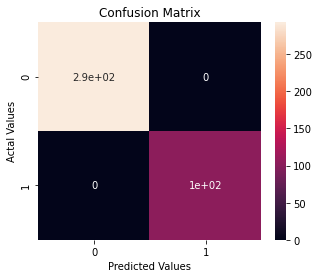

In [7]:
model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('SAG')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/40
713/713 - 3s - loss: 0.0988 - accuracy: 0.9683
Epoch 2/40
713/713 - 3s - loss: 0.0020 - accuracy: 1.0000
Epoch 3/40
713/713 - 3s - loss: 4.8620e-04 - accuracy: 1.0000
Epoch 4/40
713/713 - 3s - loss: 1.9872e-04 - accuracy: 1.0000
Epoch 5/40
713/713 - 3s - loss: 9.7384e-05 - accuracy: 1.0000
Epoch 6/40
713/713 - 3s - loss: 5.2036e-05 - accuracy: 1.0000
Epoch 7/40
713/713 - 3s - loss: 3.0117e-05 - accuracy: 1.0000
Epoch 8/40
713/713 - 3s - loss: 1.8195e-05 - accuracy: 1.0000
Epoch 9/40
713/713 - 3s - loss: 1.1656e-05 - accuracy: 1.0000
Epoch 10/40
Restoring model weights from the end of the best epoch.
713/713 - 3s - loss: 6.9759e-06 - accuracy: 1.0000
Epoch 00010: early stopping
SWELL
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       118

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00  

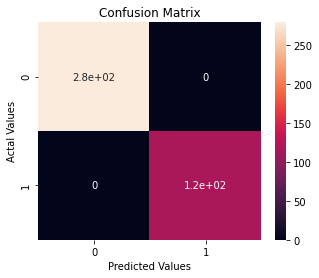

In [8]:
#SWELL
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,3]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('SWELL')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/40
713/713 - 3s - loss: 0.0837 - accuracy: 0.9750
Epoch 2/40
713/713 - 3s - loss: 0.0019 - accuracy: 1.0000
Epoch 3/40
713/713 - 3s - loss: 4.7740e-04 - accuracy: 1.0000
Epoch 4/40
713/713 - 3s - loss: 1.8475e-04 - accuracy: 1.0000
Epoch 5/40
713/713 - 3s - loss: 9.4471e-05 - accuracy: 1.0000
Epoch 6/40
713/713 - 3s - loss: 5.5690e-05 - accuracy: 1.0000
Epoch 7/40
713/713 - 3s - loss: 2.9355e-05 - accuracy: 1.0000
Epoch 8/40
713/713 - 3s - loss: 1.8670e-05 - accuracy: 1.0000
Epoch 9/40
713/713 - 3s - loss: 1.0682e-05 - accuracy: 1.0000
Epoch 10/40
713/713 - 3s - loss: 6.5949e-06 - accuracy: 1.0000
Epoch 11/40
Restoring model weights from the end of the best epoch.
713/713 - 3s - loss: 4.4003e-06 - accuracy: 1.0000
Epoch 00011: early stopping
INTERRUPTION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       279
           1       1.00      1.00      1.00       118

    accuracy                           1.00       397
   macro 

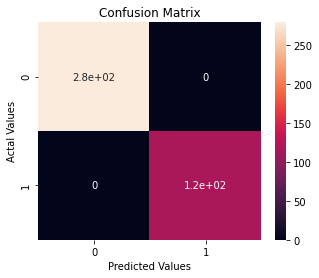

In [9]:
#INTERRUPTION
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,3]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('INTERRUPTION')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/40
713/713 - 3s - loss: 0.0398 - accuracy: 0.9905
Epoch 2/40
713/713 - 3s - loss: 0.0015 - accuracy: 1.0000
Epoch 3/40
713/713 - 3s - loss: 2.5222e-04 - accuracy: 1.0000
Epoch 4/40
713/713 - 3s - loss: 1.0596e-04 - accuracy: 1.0000
Epoch 5/40
713/713 - 3s - loss: 5.5717e-05 - accuracy: 1.0000
Epoch 6/40
713/713 - 3s - loss: 3.1546e-05 - accuracy: 1.0000
Epoch 7/40
713/713 - 3s - loss: 1.8090e-05 - accuracy: 1.0000
Epoch 8/40
713/713 - 3s - loss: 1.0535e-05 - accuracy: 1.0000
Epoch 9/40
Restoring model weights from the end of the best epoch.
713/713 - 3s - loss: 6.7487e-06 - accuracy: 1.0000
Epoch 00009: early stopping
Harmonics
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       385
           1       1.00      1.00      1.00        12

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



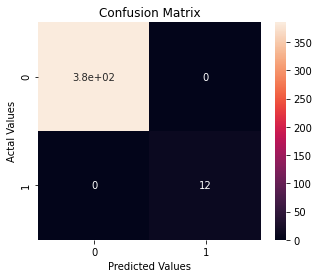

In [10]:
#Harmonics
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,4]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('Harmonics')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/40
713/713 - 3s - loss: 0.2429 - accuracy: 0.9071
Epoch 2/40
713/713 - 3s - loss: 0.1495 - accuracy: 0.9470
Epoch 3/40
713/713 - 3s - loss: 0.1323 - accuracy: 0.9523
Epoch 4/40
713/713 - 3s - loss: 0.1213 - accuracy: 0.9534
Epoch 5/40
713/713 - 3s - loss: 0.1104 - accuracy: 0.9576
Epoch 6/40
713/713 - 3s - loss: 0.0994 - accuracy: 0.9635
Epoch 7/40
713/713 - 3s - loss: 0.0924 - accuracy: 0.9644
Epoch 8/40
713/713 - 3s - loss: 0.0811 - accuracy: 0.9703
Epoch 9/40
713/713 - 3s - loss: 0.0752 - accuracy: 0.9719
Epoch 10/40
713/713 - 3s - loss: 0.0674 - accuracy: 0.9736
Epoch 11/40
713/713 - 3s - loss: 0.0623 - accuracy: 0.9747
Epoch 12/40
713/713 - 3s - loss: 0.0512 - accuracy: 0.9801
Epoch 13/40
713/713 - 3s - loss: 0.0450 - accuracy: 0.9834
Epoch 14/40
713/713 - 3s - loss: 0.0430 - accuracy: 0.9843
Epoch 15/40
713/713 - 3s - loss: 0.0323 - accuracy: 0.9896
Epoch 16/40
713/713 - 3s - loss: 0.0313 - accuracy: 0.9893
Epoch 17/40
713/713 - 3s - loss: 0.0260 - accuracy: 0.9913
Epoch 

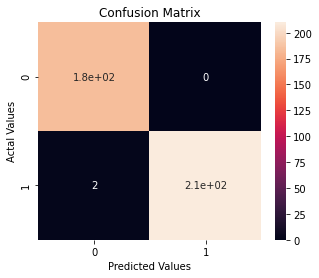

In [11]:
#Flicker
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,6]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('INTERRUPTION')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Epoch 1/40
713/713 - 3s - loss: 0.0506 - accuracy: 0.9829
Epoch 2/40
713/713 - 3s - loss: 2.0110e-04 - accuracy: 1.0000
Epoch 3/40
713/713 - 3s - loss: 4.0829e-05 - accuracy: 1.0000
Epoch 4/40
713/713 - 3s - loss: 1.5360e-05 - accuracy: 1.0000
Epoch 5/40
713/713 - 3s - loss: 6.0461e-06 - accuracy: 1.0000
Epoch 6/40
713/713 - 3s - loss: 2.5298e-06 - accuracy: 1.0000
Epoch 7/40
713/713 - 3s - loss: 1.2378e-06 - accuracy: 1.0000
Epoch 8/40
Restoring model weights from the end of the best epoch.
713/713 - 3s - loss: 6.7361e-07 - accuracy: 1.0000
Epoch 00008: early stopping
Transient
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       346
           1       1.00      1.00      1.00        51

    accuracy                           1.00       397
   macro avg       1.00      1.00      1.00       397
weighted avg       1.00      1.00      1.00       397



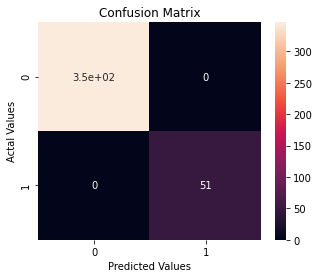

In [12]:
#Transient
a = np.load('220vnoise.npy',allow_pickle=True)
df = pd.DataFrame(a, columns = ['Signal','Class','Sag','Swell','Intrpn','Harmonic','Flicker','Transient'])

signal = df.iloc[:, 0]
classes = np.array(df.iloc[:,7]).astype('int32')

df2=df.drop(['Signal','Class'],axis=1)
df2=df2.astype(str).astype('float32')
yarr=np.array(df2.iloc[:,:]).astype('int32')


s = []
for i in signal: 
    s.append(i)
signal = np.array(s)

signal = np.reshape(signal, (3961,200,1))


trans = MinMaxScaler((-1,1))
signal2= np.array(s)
signal2 = np.reshape(signal, (3961,200,1))
for i in range(len(signal)):
    signal2[i] = trans.fit_transform(signal[i])
x_train, x_test, y_train, y_test = train_test_split(signal2, classes, test_size=0.1, random_state=42)

model3 = Sequential()
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform', input_shape=(200,1)))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Conv1D(filters=32, kernel_size=3, activation='relu',kernel_initializer='he_uniform'))
model3.add(AveragePooling1D(pool_size=2))
model3.add(Flatten())
model3.add(Dense(100, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(500, activation='relu',kernel_initializer='he_uniform'))
model3.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
estp = EarlyStopping(monitor='loss', min_delta=0.0001,patience=5, verbose=1, mode='auto',restore_best_weights=True)
model3.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=40, batch_size=5, verbose=2,callbacks=[estp])

pred3 = model3.predict(x_test)
pred3=(pred3>0.5).astype(int)
print('Transient')
print(classification_report(y_test, pred3,zero_division=0))
yt=y_test
yp=pred3
cnf=confusion_matrix(yt,yp)
cm_df = pd.DataFrame(cnf,
                     index = [0,1], 
                     columns = [0,1])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()